<table style="width: 100%">
    <tr style="background: #ffffff">
        <td style="padding-top:25px;width: 180px"><img src="https://mci.edu/templates/mci/images/logo.svg" alt="Logo"></td>
        <td style="width: 100%">
            <div style="text-align:right; width: 100%; text-align:right"><font style="font-size:38px"><b>Visualisierung und Datenbanken</b></font></div>
            <div style="padding-top:0px; width: 100%; text-align:right"><font size="4"><b>WS 2022</b></font></div>
        </td>
    </tr>
</table>

---

# 7 Final Challenge

In Wold Anti-Doping Agency [WADA](https://www.wada-ama.org/en) made a raid in the team hotel of elite cyclist team.

They found syringes and vials with a clear liquid. They send the vials to be analyzed in a lab. The lab found out, that liquid in the vials contain an virus and performed a sequence analysis. However, the lab is overrun with urgent tasks due to a new corona wave so they sent the results to You for further analysis.



## 7.1 - Sequence

Given the following FASTQ-Files. Evaluate the quality of the reads and assemble the sequence. Use the sequence to find out, what are the cyclists up to?

Minimal Requiements for Submission:
- Two plots that provide an overview on the sequencing quality and a short dicussion of the plots.
- A FASTA-File of the assembled sequence(s) or contigs.
- A screenshot of the matches You found to the sequences/ contig (Hint: You are nor only looking for a Virus)
- Discussion on what the idea of the cyclist teamcould be.

In [ ]:
# Prepartion

# Installing Biopython
!pip install biopython
from Bio import SeqIO



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from Bio import SeqIO
for seq_record in SeqIO.parse("EPO.FASTA", "fasta"):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))
    epo = seq_record.seq

NM_000799.4
Seq('CCTTTCCCAGATAGCACGCTCCGCCAGTCCCAAGGGTGCGCAACCGGCTGCACT...CAA')
1662


In [ ]:
for seq_record in SeqIO.parse("AdenoVirus.FASTA", "fasta"):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))
    adeno = seq_record.seq

AC_000008.1
Seq('CATCATCAATAATATACCTTATTTTGGATTGAAGCCAATATGATAATGAGGGGG...ATG')
35938


In [ ]:
# join sequence
all_data = str(epo) +str(adeno)

In [ ]:
from numpy import random

fragment_length = 200
number_of_segements = 200


full_dna_sequence = all_data
print("The final DNA sequence is {} long.".format(len(full_dna_sequence)))

list_of_fragments = []

# The seed ensures, hat everybody gets the same results, when we randomly split the data
random.seed(1)

list_of_fragments.append(full_dna_sequence[0:fragment_length])

for i in range(1,number_of_segements):
  random_fragment_length = fragment_length + random.randint(-40,40)
  start = random.randint(0, len(full_dna_sequence))
  end = start + random_fragment_length
  list_of_fragments.append(full_dna_sequence[start:end])
  #print("From {} to {}".format(start, end))

#full_dna_sequence

print("Created a list of {} subquences that are {} long.".format(number_of_segements,fragment_length))


The final DNA sequence is 37600 long.
Created a list of 200 subquences that are 200 long.


In [ ]:
max(1,2)

2

In [ ]:
#list_of_fragments


fragment=list_of_fragments[0]

def create_quality_to_fragment(fragment):

  low_to_high_quality = """!"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~"""
  low_to_high_quality = """!"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJK"""


  quality = []
  
  i = 0
  for position in fragment:
    position = int(len(low_to_high_quality) - i/(len(fragment)/len(low_to_high_quality)))
    position = position + random.randint(-10,10)
    position = min(len(low_to_high_quality)-1,position)
    position = max(0,position)
    #print(position)
    i = i+1
    quality.append(low_to_high_quality[position])
  return quality

  quality = create_quality_to_fragment(fragment)

In [ ]:
"".join(quality)

"~{~~~~t{~x~pzww|yq{~|lyonijwqsnpqugdmhtkiococrq^^fgmog`f`jbfXkY]Zed^aXV^cYaca]YSW\\]URVS]PLT]VNPWSQGFFVJLIURTGEDBKID?OJFOL@MI@D@9>>@F6G<5>BGA<9@;6?3=;AA8<9.?78;84+0-'1(/-*(-%)/1%!&,/)/%-)!)#,!,++'!#!&("

In [ ]:
ofile = open("sequencing_results.FASTQ", "w")

for i in range(len(list_of_fragments)):

  ofile.write("@ Read number " + str(i) + "\n" +list_of_fragments[i] + "\n" + "+ \n" + "".join(create_quality_to_fragment(list_of_fragments[i]))+ "\n")

#do not forget to close it

ofile.close()

In [ ]:
ofile = open("sequencing_results.FASTA", "w")

for i in range(len(list_of_fragments)):

  ofile.write("> Read number " + str(i) + "\n" +list_of_fragments[i] + "\n")

#do not forget to close it

ofile.close()

Lösung

In [ ]:
# rud

# >Contig1
CCTTTCCCAGATAGCACGCTCCGCCAGTCCCAAGGGTGCGCAACCGGCTGCACTCCCCTC
CCGCGACCCAGGGCCCGGGAGCAGCCCCCATGACCCACACGCACGTCTGCAGCAGCCCCG
CTCACGCCCCGGCGAGCCTCAACCCAGGCGTCCTGCCCCTGCTCTGACCCCGGGTGGCCC
CTACCCCTGGCGACCCCTCACGCACACAGCCTCTCCCCCACC
>Contig2
ATATCTGCACCCCTCACAGTTACCTCAGAAGCCCTAACTGTGGCTGCCGCCGCACCTCTA
ATGGTCGCGGGCAACACACTCACCATGCAATCACAGGCCCCGCTAACCGTGCACGACTCC
AAACTTAGCATTGCCACCCAAGGACCCCTCACAGTGTCAGAAGGAAAGCTAGCCCTGCAA
ACATCAGGCCCCCTCACCACCACCGATAGCAGTACCCTTACTATCACTGCCTCACCCCCT
CTAACTACTGCCACTGGTAGCTTGGGCATTGACTTGAAAGAGCCCATTTATACACAAAAT
GGAAAACTAGGACTAAAGTACGGGGCTCCTTTGCATGTAACAGACGACCTAAACACTTTG
ACCGTAGCAACTGGTCCAGGTGTGACTATTAATAATACTTCCTTGCAAACTAAAGTTACT
GGAGCCTTGGGTTTTGATTCACAAGGCAATATGCAACTTAATG
>Contig3
GTGAGTACTCCCTCTGAAAAGCGGGCATGACTTCTGCGCTAAGATTGTCAGTTTCCAAAA
ACGAGGAGGATTTGATATTCACCTGGCCCGCGGTGATGCCTTTGAGGGTGGCCGCATCCA
TCTGGTCAGAAAAGACAATCTTTTTGTTGTCAAGCTTGGTGGCAAACGACCCGTAGAGGG
CGTTGGACAGCAACTTGGCGATGGAGCGCAGGGTTTGGTTTTTGTCGCGATCGGCGCGCT
CCTTGGCCGCGATGTTTAGCTGCACGTATTCGCGCGCAACGCACCGCCATTCGGGAAAG
>Contig4
AGCATGTTGCAGAACTTTAGGAACTTTATCCTAGAGCGCTCAGGAATCTTGCCCGCCACC
TGCTGTGCACTTCCTAGCGACTTTGTGCCCATTAAGTACCGCGAATGCCCTCCGCCGCTT
TGGGGCCACTGCTACCTTCTGCAGCTAGCCAACTACCTTGCCTACCACTCTGACATAATG
GAAGACGTGAGCGGTGACGGTCTACTGGAGTGTCACTGTCGCTGCAACCTATGCACCCCG
CACCGCTCCCTGGTTTGCAATTCGCAGCTGCTTAACGAAAGTCAAATTATCGGTACCTTT
GAGCTGCAGGGTCCCTCGCCTGACGAAAAGTCCGCGGCTCCGGGGTTGAAACTCACTCCG
GGGCTGTGGACGTCGGCTTACCTTCGCAAATTTGTACCTGAGGACTACCACGCCCA
>Contig5
ACATTGTCAGTCAAGTTTACTTAAACGGAGACAAAACTAAACCTGTAACACTAACCATTA
CACTAAACGGTACACAGGAAACAGGAGACACAACTCCAAGTGCATACTCTATGTCATTTT
CATGGGACTGGTCTGGCCACAACTACATTAATGAAATATTTGCCACATCCTCTTACACTT
TTTCATACATTGCCCAAGAATAAAGAATCGTTTGTGTTATGTTTCAACGTGTTTATTTTT
CAATTGCAGAAAATTTCAAGTCATTTTTCATTCAGTAGTATAGCCCCACCACCACATAGC
TTATACAGATCACCGTACCTTAATCAAACTCACAGAACCCTAGTATTCAACCTGCCACCT
CCCTCCCAACACACAGAGTACACAGTCCTTTCTCCCCGGCTGGCCTTAAAAAGCATCATA
TCATGGGTAACAGACATATTCTTAGGTGTTATATTCCACACGGTTTCCTGTCGAGCCAAA
CGCTCATCAGTGATATTAATAAACTCCCCGGGCAGCTCACTTAAGTTCATGTCGCTGTCC
AGCTGCTGAGCCACAGGCTGCTGTCCAACTTGCGGTTGCTTAACGGGCGGCGAAGGAGAA
GTCCACGCCTA
>Contig6
GTGCGCCGGTGTACACAGGAAGTGACAATTTTCGCGCGGTTTTAGGCGGATGTTGTAGTA
AATTTGGGCGTAACCGAGTAAGATTTGGCCATTTTCGCGGGAAAACTGAATAAGAGGAAG
TGAAATCTGAATAATTTTGTGTTACTCATAGCGCGTAATATTTGTCTAGGGCCGCGGGGA
CTTTGACCGTTTACGTGGAGACTCGCCCAGGTGTTTTTCTCAGGTGTTTTCCGCGTTCCG
GGTCAAAGTTGGCGTTTTATTATTATAGTCAGCTGACGTGTAGTGTATTTATACCCGGTG
AGTTCCTCAAGAGGCCACTCTTGAGTGCCAGCGAGTAGAGTTTTCTCCTCCGAGCCGCTC
CGACACCGGGACTGAAAATGAGACATATTATCTGCCACGGAGGTGTTATTACCGAAGAAA
TGGCCGCCAGTCTTTTGGACCAGCTGATCGAAGAGGTACTGGCTGATAATCTTCCACCTC
CTAGCCATTTTGAACCACCTACCCTTCACGAACTGTATGATTTAGACGTG
>Contig7
TTTTAGCTTAATGACCAGACACCGTCCTGAGTGTATTACTTTTCAACAGATCAAGGATAA
TTGCGCTAATGAGCTTGATCTGCTGGCGCAGAAGTATTCCATAGAGCAGCTGACCACTTA
CTGGCTGCAGCCAGGGGATGATTTTGAGGAGGCTATTAGGGTATATGCAAAGGTGGCACT
TAGGCCAGATTGCAAGTACAAGATCAGCAAACTTGTAAATATCAGGAATTGTTGCTACAT
TTCTGGGAAC
>Contig8
AATGTGGCAGTCAAATACTTGCTACAGTTTCAGTTTTGGCTGTTAAAGGCAGTTTGGCTC
CAATATCTGGAACAGTTCAAAGTGCTCATCTTATTATAAGATTTGACGAAAATGGAGTGC
TACTAAACAATTCCTTCCTGGACCCAGAATATTGGAACTTTAGAAATGGAGATCTTACTG
AAGGCACAGCCTATACAAACGCTGTTGGATTTATGCCTAACCTATCAGCTTATCCAAAAT
CTCACGGTAAAACTGCCAAAAGTAACATTGTCAGTCAAGTTTACTTAAACGGAGACAAAA
CTAA
>Contig9
TCTGCGCCGTTTAAAAATCAAAGGGGTTCTGCCGCGCATCGCTATGCGCCACTGGCAGGG
ACACGTTGCGATACTGGTGTTTAGTGCTCCACTTAAACTCAGGCACAACCATCCGCGGCA
GCTCGGTGAAGTTTTCACTCCACAGGCTGCGCACCATCACCAACGCGTTTAGCAGGTCGG
GCGCCGATATCTTGAAGTCGCAGTTGGGGCCTCCGCCCTGCGCGCGCGAGTTGCGATACA
CAGGGTTGCAGCACTGGAACACTATCAGCGCC
>Contig10
ACGTGGCGGCCGCCGACCTGGTAACCGCATACGAGCAGACGGTGAACCAGGAGATTAACT
TTCAAAAAAGCTTTAACAACCACGTGCGTACGCTTGTGGCGCGCGAGGAGGTGGCTATAG
GACTGATGCATCTGTGGGACTTTGTAAGCGCGCTGGAGCAAAACCCAAATAGCAAGCCGC
TCATGGCGCAGCTGTTCCTTATAGTGCAGCACAGCAGGGACAACGAGGCATTCAGGGATG
CGCTGCTAAACATAGTAGAGCCCGAGGGCCGCT
>Contig11
GCGGCGGCGGCTGGCGGTAGAGGGGCCAGCGTAGGGTGGCCGGGGCTCCGGGGGCGAGAT
CTTCCAACATAAGGCGATGATATCCGTAGATGTACCTGGACATCCAGGTGATGCCGGCGG
CGGTGGTGGAGGCGCGCGGAAAGTCGCGGACGCGGTTCCAGATGTTGCGCAGCGGCAAAA
AGTGCTCCATGGTCGGGACGCTCTGGCCGGTCAGGCGCGCGCAATCGTTGACGCTCTAGA
CCGTGCAAAAGGAGAGCCTGTAAGCGGGCACTCTTCCGTGGTCTGGTGGATAAATTCGCA
AGGGTATCATGGCGGACGACCGGGGTTCGAGCCCCGTATCCGGCCGTCCGCCGTGATCCA
TGCGGTTACCGCCCGCGTGTCGAACCCAGGTGTGCGACGTCAGACAACGGGGGAGTGCTC
CTTTTGGCTTCCTTCCAGGCGCGGCGGCTGCTGCGCTAGCTTTTTTGGCCACTGGCCGCG
CGCAGCGTAAGCGGTTAGGCTGGAAAGCGAAAGCATTAAGTGGCT
>Contig12
TTCATCACCGTAATTTCACTTTCCGCTTCGCTGGGCTCTTCCTCTTCCTCTTGCGTCCGC
ATACCACGCGCCACTGGGTCGTCTTCATTCAGCCGCCGCACTGTGCGCTTACCTCCTTTG
CCATGCTTGATTAGCACCGGTGGGTTGCTGAAACCCACCATTTGTAGCGCCACATCTTCT
CTTTCTTCCTCGCTGTCCACGATTACCTCTGGTGATGGCGGGCGCTCGGGCTTGGGAGAA
GGGCGCTTCTTTTTCTTCTTGGGCGCAATGGCCAAATCCGCCGCCGAGGTCGATGGC
>Contig13
GGCCCACAACACCGCCTCCACGCTTGAGGCCATGCTTAGAAACGACACCAACGACCAGTC
CTTTAACGACTATCTCTCCGCCGCCAACATGCTCTACCCTATACCCGCCAACGCTACCAA
CGTGCCCATATCCATCCCCTCCCGCAACTGGGCGGCTTTCCGCGGCTGGGCCTTCACGCG
CCTTAAGACTAAGGAAACCCCATCACTGGGCTCGGGCTACGACCC
>Contig14
CTCAGCGACCGCGAGCTGATGCACAGCCTGCAAAGGGCCCTGGCTGGCACGGGCAGCGGC
GATAGAGAGGCCGAGTCCTACTTTGACGCGGGCGCTGACCTGCGCTGGGCCCCAAGCCGA
CGCGCCCTGGAGGCAGCTGGGGCCGGACCTGGGCTGGCGGTGGCACCCGCGCGCGCTGGC
AACGTCGGCGGCGTGG
>Contig15
ACAAATGCTAGCTAACTACAACATTGGCTACCAGGGCTTCTATATCCCAGAGAGCTACAA
GGACCGCATGTACTCCTTCTTTAGAAACTTCCAGCCCATGAGCCGTCAGGTGGTGGATGA
TACTAAATACAAGGACTACCAACAGGTGGGCATCCTACACCAACACAACAACTCTGGATT
TGTTGGCTACCTTGCCCCCACCATGCGCGAAGGACAGGCCTACCCTGCTAACTTCCCCTA
TCCGCTTATAGGCAAGACCGCAGTTGACAGCATTACCCAGAAAAAGTTTCTTTGCGATCG
CACCCTTT
>Contig16
CCCTCCGGTGGCGTGGTCAAACTCTACAGCCAAAGAACAGATAATGGCATTTGTAAGATG
TTGCACAATGGCTTCCAAAAGGCAAACGGCCCTCACGTCCAAGTGGACGTAAAGGCTAAA
CCCTTCAGGGTGAATCTCCTCTATAAACATTCCAGCACCTTCAACCATGCCCAAATAATT
CTCATCTCGCCACCTTCTCAATATATCTCTAAGCAAATCCCGAATATTAAGTCCGGCCAT
TGTAAAAATCTGCTCCAGAGCGCCCTCCACCTTCAGCCTCAAGCAGCGAATCATGATTGC
AAAAATTC
>Contig17
TGTAGCAGGAGGACTAAGGATTGATTCTCAAAACAGACGCCTTATACTTGATGTTAGTTA
TCCGTTTGATGCTCAAAACCAACTAAATCTAAGACTAGGACAGGGCCCTCTTTTTATAAA
CTCAGCCCACAACTTGGATATTAACTACAACAAAGGCCTTTACTTGTTTACAGCTTCAAA
CAATTCCAAAAAGCTTGAGGTTAACCTAAGCACTGCCAAGGGGTTGATGTTTGACGCTAC
AGCCATAGCCATTAATGCAGGA
>Contig18
CACGCACGAAGGAGGCGTAGGAGTCGCGCAGCTTGTTGACCAGCTCGGCGGTGACCTGCA
CGTCTAGGGCGCAGTAGTCCAGGGTTTCCTTGATGATGTCATACTTATCCTGTCCCTTTT
TTTTCCACAGCTCGCGGTTGAGGACAAACTCTTCGCGGTCTTTCCAGTACTCTTGGATCG
GAAACCCGTCGGCCTCCGAACGGTAAGAGCCTAGCATGTAGAACTGGTTGACGGCCTGGT
AGGCGCAGCATCCCTTTTCTACGGGTAGCGCGTATGCC
>Contig19
CGCCGCCGCCGTCGCCGTCGCCAGCCCGTGCTGGCCCCGATTTCCGTGCGCAGGGTGGCT
CGCGAAGGAGGCAGGACCCTGGTGCTGCCAACAGCGCGCTACCACCCCAGCATCGTTTAA
AAGCCGGTCTTTGTGGTTCTTGCAGATATGGCCCTCACCTGCCGCCTCCGTTTCCCGGTG
CCGGGATTCCGAGGAAGAATGCACCGTAGGAGGGGCATGGCCGGCCACGGCCTGACGGGC
GGCATGCGTCGTGCGCACCACCGGC
>Contig20
CACTCCAAGAGCTTCTACAACGACCAGGCCGTCTACTCCCAACTCATCCGCCAGTTTACC
TCTCTGACCCACGTGTTCAATCGCTTTCCCGAGAACCAGATTTTGGCGCGCCCGCCAGCC
CCCACCATCACCACCGTCAGTGAAAACGTTCCTGCTCTCACAGATCACGGGACGCTACCG
CTGCGCAACAGCATCGGAGGAGTCCAGCGAGTGACCATTACTGACGCCAGACGCCGCACC
TGCCCCTA
>Contig21
TATTACCGGGGTACCCAACTCCATGCTCAACAGTCCCCAGGTACAGCCCACCCTGCGTCG
CAACCAGGAACAGCTCTACAGCTTCCTGGAGCGCCACTCGCCCTACTTCCGCAGCCACAG
TGCGCAGATTAGGAGCGCCACTTCTTTTTGTCACTTGAAAAACATGTAAAAATAATGTAC
TAGAGACACTTTCAATAAAGGCAAATGC
>Contig22
CAGCTCAACGACGAGTCGGTGAGCTCCTCGCTTGGTCTCCGTCCGGACGGGACATTTCAG
ATCGGCGGCGCCGGCCGTCCTTCATTCACGCCTCGTCAGGCAATCCTAACTCTGCAGACC
TCGTCCTCTGAGCCGCGCTCTGGAGGCATTGGAACTCTGCAATTTATTGAGGAGTTTGTG
CCATCGGTCTACTTTAACCCCTTCTCGGGACCTCCCGGCCACTATCCGGATCAATTTATT
CCTAACTTTGACGCGGTAAAGGACTCGGCGGACGGCTACGACTGAATGTTAAGTGGAGAG
GCAGAGCAACTGCGCCTGAAACACCTGGTCCACTGT
>Contig23
AACGTGGAGCTCTGCAACCTGGTCTCCTACCTTGGAATTTTGCACGAAAACCGCCTTGGG
CAAAACGTGCTTCATTCCACGCTCAAGGGCGAGGCGCGCCGCGACTACGTCCGCGACTGC
GTTTACTTATTTCTATGCTACACCTGGCAGACGGCCATGGGCGTTTGGCAGCAGTGCTTG
GAGGAGTGCAACCTCAAGGAGCTGCAGAAACTGCTAAAGCAAAACTTGAAGGACCTATGG
ACGGCCTTCAACGAGCGCTCCGTGGCCGCGCACCTGGCGGACATCATTTTCCCCGAACGC
CTGCTTAAAACCCTGCAACAGGGTCTGCCAGACTTCACCAGTC
>Contig24
AAGCGGTTAAGCTGGGATGGGTGCATACGTGGGGATATGAGATGCATCTTGGACTGTATT
TTTAGGTTGGCTATGTTCCCAGCCATATCCCTCCGGGGATTCATGTTGTGCAGAACCACC
AGCACAGTGTATCCGGTGCACTTGGGAAATTTGTCATGTAGCTTAGAAGGAAATGCGTGG
AAGAACTTGGAGACGCCCTTGTGACCTCCAAGATTTTCCATGCATTCGTCCATAATGATG
GCAATGGGCCCACGGGCGGCGGCCTGGGCGAAGATATTTCTGGGATCACTAACGTCATAG
TTGTGTTCCAGGATGAGATCGTCATAGGCCATTTTTACAAAGCGCGGGCGGAG
>Contig25
GTGACGAAAAGGCTGTCCGTGTCCCCGTATACAGACTTGAGAGGCCTGTCCTCGAGCGGT
GTTCCGCGGTCCTCCTCGTATAGAAACTCGGACCACTCTGAGACAAAGGCTCGCGTCCAG
GCCAGCACGAAGGAGGCTAAGTGGGAGGGGTAGCGGTCGTTGTCCACTAGGGGGTCCACT
CGCTCCAGGGTGTGAAGACACATGTCGCCCTCTTCGGCATCAAGGAAGGTGATTGGTTTG
TAGGTGTAGGCCACGTGACCGGGTGTTCCTGAAGGGGGGCTATAAAAGGGGGTGGGGGCG
CGTTCGTCCTCACTC
>Contig26
AAGACGTACGCGCAGGAGCACAGGGACGTGCCAGGCCCGCGCCCGCCCACCCGTCGTCAA
AGGCACGACCGTCAGCGGGGTCTGGTGTGGGAGGACGATGACTCGGCAGACGACAGCAGC
GTCCTGGATTTGGGAGGGAGTGGCAACCCGTTTGCGCACCTTCGCCCCAGGCTGGGGAGA
ATGTTTTAAAAAAAAAAAAGCATGATGCAAAATAAAAAACTCACCAAGGCCATGGCACCG
AGCGTTGGTTTTCTTGTATTCCCCTTAGTATGCGGC
>Contig27
CTCTGGCCCCGCGACACGGCTCGCGCCCGTTCATGGGAAACTGGCAAGATATCGGCACCA
GCAATATGAGCGGTGGCGCCTTCAGCTGGGGCTCGCTGTGGAGCGGCATTAAAAATTTCG
GTTCCACCGTTAAGAACTATGGCAGCAAGGCCTGGAACAGCAGCACAGGCCAGATGCTGA
GGGATAAGTTGAAAGAGCAAAATTTCCAACAAAAGGTGGTAGATGGCCTGGCCTCTGGCA
TTAGCGGGGTGGTGGACCTGGCCAACCAGGCAGTGCAAAATAAGATTAACAGTAAGCTTG
ATCCCCGCCCTCCCGTAGAGGAGCCTCC
>Contig28
CAGTACCAACAGAGGATAAAAAGCAAGACCAGGACAACGCAGAGGCAAACGAGGAACAAG
TCGGGCGGGGGGACGAAAGGCATGGCGACTACCTAGATGTGGGAGACGACGTGCTGTTGA
AGCATCTGCAGCGCCAGTGCGCCATTATCTGCGACGCGTTGCAAGAGCGCAGCGATGTGC
CCCTCGCCATAGCGGATGTCAGCCTTGCCTACGAACGCCACCTATTCTCACCGCGCGTAC
CCCCCAAACGCCAAGAAAACGGCACATGCGAGCCCAACCCGCGCCTCAACTTCTACCCCG
TATTTGCCGTGCCAGAGGTGCTTGCCACCTATCACATCTTTTTCCA
>Contig29
CCCTTGGTGGCAAGAGCCCCCTTGACACCGGGGTGGTGGGAACCATGAAGACAGGATGGG
GGCTGGCCTCTGGCTCTCATGGGGTCCAAGTTTTGTGTATTCTTCAACCTCATTGACAAG
AACTGAAACCACCAACATCATCAATAATATACCTTATTTTGGATTGAAGCCAATATGATA
ATGAGGGGGTGGAGTTTGTGACGTGGCGCGGGGCGTGGGAACGGGGCGGGTGACGTAGTA
GTGTGGCGGAAGTGTGATGTTGCAAGTGTGGCGGAACACATGTAAGCGACGGATGTGGCA
AAAGTGACGTTTTTGGTGTGCGCCGGTGTACACAGGAAGTGA
>Contig30
CAGACTTTTTCCGGACAGACCTCAATAACTCTGTTTACCAGAACAGGAGGTGAGCTTAGA
AAACCCTTAGGGTATTAGGCCAAAGGCGCAGCTACTGTGGGGTTTATGAACAATTCAAGC
AACTCTACGGGCTATTCTAATTCAGGTTTCTCTAGAATCGGGGTTGGGGTTATTCTCTGT
CTTGTGATTCTCTTTATTCTTATACTAACGCTTCTCTGCCTAAGGCTCGCCGCCTGCTGT
GTGCACATTTGCATTTATTGTCAGCT
>Contig31
GTTTTGGAGGTTTCTGTGGGGCTCATCCCAGGCAAAGTTAGTCTGCAGAATTAAGGAGGA
TTACAAGTGGGAATTTGAAGAGCTTTTGAAATCCTGTGGTGAGCTGTTTGATTCTTTGAA
TCTGGGTCACCAGGCGCTTTTCCAAGAGAAGGTCATCAAGACTTTGGATTTTTCCACACC
GGGGCGCGCTGCGGCTGCTGTTGCTTTTTTGAGTTTTATAAAGGATAAATGGAGCGAAGA
AACCCATCTGAGCGGGGGGTACCTGCTGGATTTTCTGGCCATGCATCTGTGGAGAGCGGT
TGTGAGACACAAGAATCGCCTGCTACTGTTGTCTTCCGTCCGCCCGGCGATAATACCGAC
GGAGGAGCAGCAGCAGCAGCAGGAGGAAGCCAGGCGGCGGCGGCAGGAGCAGAGCCCATG
GAACCCGAGAGCCGGCCTGGACCCTCGGGAATGAATGTTGTACAGGTGG
>Contig32
ATAGTCCAGCCCCTCCGCGGCGTGGCCCTTGGCGCGCAGCTTGCCCTTGGAGGAGGCGCC
GCACGAGGGGCAGTGCAGACTTTTGAGGGCGTAGAGCTTGGGCGCGAGAAATACCGATTC
CGGGGAGTAGGCATCCGCGCCGCAGGCCCCGCAGACGGTCTCGCATTCCACGAGCCAGGT
GAGCTCTGGCCGTTCGGGGTCAAAAACCAGGTTTCCCCCATGCTTTTTGATGCGTTTCTT
ACCTCTGGTTTCCATGAGCCGGTGTC
>Contig33
TCCACACAAGCTCGCCTGCGCCATAGTCAATACGGCCGGTCGCGAGACTGGGGGCGTACA
CTGGATGGCCTTTGCCTGGAACCCGCACTCAAAAACATGCTACCTCTTTGAGCCCTTTGG
CTTTTCTGACCAGCGACTCAAGCAGGTTTACCAGTTTGAGTACGAGTCACTCCTGCGCCG
TAGCGCCATTGCTTCTTCCCCCGACCGCTGTATAACGCTGGAAAAGTCCACCCAAA
>Contig34
CTCCCTCGTTCCAGACGCGGCTGTAGACCACGCCCCCTTCGGCATCGCGGGCGCGCATGA
CCACCTGCGCGAGATTGAGCTCCACGTGCCGGGCGAAGACGGCGTAGTTTCGCAGGCGCT
GAAAGAGGTAGTTGAGGGTGGTGGCGGTGTGTTCTGCCACGAAGAAGTACATAACCCAGC
GTCGCAACGTGGATTCGTTGATATCCCCCAAGGCCTCAAGGCGCTCCATGGCCTCGTAGA
AGTCCACGGCGAAGTTGAAAAACTGGGAGTTGCGCGCCGACACGGTTAACTCCTCCTCCA
GAAGACGGATGAGCTCGGCGACAGTGTCGCGCACCTCGCGCTCAAAGGCTACAGGGGCCT
CTTCTTCTTCTTCAATCTCCTCTTCCATAAGGGCCTCCCCTTCTTCTTCTTCTGGCGGCG
GTGGGGGAGGGGGGACACGGCGGCGACGACGGCGCACCGGGAGGCGGTCGACAAAGCGCT
CGATCATCTCCCCGCGGCGACGGCGCATGGTCTCGGTGACGGCGCGGCCGTTCTCGCG
>Contig35
CACGCCTCATCTGTGACAGCCGAGTCCTGGAGAGGTACCTCTTGGAGGCCAAGGAGGCCG
AGAATATCACGACGGGCTGTGCTGAACACTGCAGCTTGAATGAGAATATCACTGTCCCAG
ACACCAAAGTTAATTTCTATGCCTGGAAGAGGATGGAGGTCGGGCAGCAGGCCGTAGAAG
TCTGGCAGGGCCTGGCCCTGCTGTCGGAAGCTGTCCTGCGGGGCCAGGCCCTGTTGGTCA
ACTCTTCCCAGCCGTGGGAGCCCCTGCAGCTGCATGTGGATAAAGCCGTCAGTGGCC
>Contig36
CCAGCAATAACACAGGCTGGGGCCTGCGCTTCCCAAGCAAGATGTTTGGCGGGGCCAAGA
AGCGCTCCGACCAACACCCAGTGCGCGTGCGCGGGCACTACCGCGCGCCCTGGGGCGCGC
ACAAACGCGGCCGCACTGGGCGCACCACCGTCGATGACGCCATCGACGCGGTGGTGGAGG
AGGCGCGCAACTACACGCCCACGCCGCCACCAGTGTCCACAGTGGACGCGGCCATTCAGA
CCGTGGTGCGC
>Contig37
AACGCCGGACGTAGTCATATTTCCTGAAGCAAAACCAGGTGCGGGCGTGACAAACAGATC
TGCGTCTCCGGTCTCGCCGCTTAGATCGCTCTGTGTAGTAGTTGTAGTATATCCACTCTC
TCAAAGCATCCAGGCGCCCCCTGGCTTCGGGTTCTATGTAAACTCCTTCATGCGCCGCTG
CCCTGATAACATCCACCACCGCAGAATAAGCCACACCCAGCCAACCTACACATTCGTTCT
GCGAGTCACACACGGGAGGAGCGGGAAGAGCTGGAAGAACCATGTTTTTTTTTTTATTCC
AAAAGATTATCCAAAACCTCAAAATGAAGATCTATTAAGTGAACGCGCTCCCCTCCGGTG
G
>Contig38
ATGTCCAAGGTGAACCTGAACGGGGTGTTTGACATGACCATGAAGATCTGGAAGGTGCTG
AGGTACGATGAGACCCGCACCAGGTGCAGACCCTGCGAGTGTGGCGGTAAACATATTAGG
AACCAGCCTGTGATGCTGGATGTGACCGAGGAGCTGAGGCCCGATCACTTGGTGCTGGCC
TGCACCCGCGCTGAGTTTGGCTCTAGCGATGAAGATACAGATTGAGGTACTGAAATGTGT
GGGCGTGGCTTAAGGGTGGGAAAGAATATATAAGGTGGGGGTCTTATGTAGTTTTGTATC
TGTTTTGCAGCAGCCGCCGCCGCCATGAGCACCAACTCGTTTGATGGAAGCATTGTGAGC
TCATATTTGACAACGCGCATGCCCCCATGGGCCGGGGTGCGTCAGAATGTGATGGGCTCC
AGCATTGATGGTCGCCCCGTCCTGCCCGCAAACTCTACTACCTTGACCTACGAGACCGTG
TCTGGAACGCCGTTGGAGACTGCAGCCTCCGCCGCCGCTTCAGCCGCTGCA
>Contig39
TAAAATATACTGGGGCTCCTATCGCCATCCTGTAAACGCCACCGTCTTCACCCGCCCAAG
CAAACCAAGGCGAACCTTACCTGGTACTTTTAACATCTCTCCCTCTGTGATTTACAACAG
TTTCAACCCAGACGGAGTGAGTCTACGAGAGAACCTCTCCGAGCTCAGCTACTCCATCAG
AAAAAACACCACCCTCCTTACCTGCCGGGAACGTACGAGTGCGTCACCGGCCGCTGCACC
ACACCTACCGCCTGACCGTAAACCAGACTTTTTCCGGACA
>Contig40
ACCAGTAAAAAAGAAAACCTATTAAAAAAACACCACTCGACACGGCACCAGCTCAATCAG
TCACAGTGTAAAAAAGGGCCAAGTGCAGAGCGAGTATATATAGGACTAAAAAATGACGTA
ACGGTTAAAGTCCACAAAAAACACCCAGAAAACCGCACGCGAACCTACGCCCAGAAACGA
AAGCCAAAAAACCCACAACTTCCTCAAATCGTCACTT
>Contig41
ACTAAGCGGTGATGTTTCTGATCAGATGATGCAAGACGCAACGGACCCGGCGGTGCGGGC
GGCGCTGCAGAGCCAGCCGTCCGGCCTTAACTCCACGGACGACTGGCGCCAGGTCATGGA
CCGCATCATGTCGCTGACTGCGCGCAATCCTGACGCGTTCCGGCAGCAGCCGCAGGCCAA
CCGGCTCTCCGCAATTCTGGAAGCGGTGGTCCCGGCGCGCGCAAACCCCACGCACGAGAA
GGTGCTGGCGATCGTAAACGCGCTGGCCGAAAACAGGGCCATCCGGCCCGACGAGGCCGG
CCTGGTCTACG
>Contig42
GACGAGGAGGAGGAGGACATGATGGAAGACTGGGAGAGCCTAGACGAGGAAGCTTCCGAG
GTCGAAGAGGTGTCAGACGAAACACCGTCACCCTCGGTCGCATTCCCCTCGCCGGCGCCC
CAGAAATCGGCAACCGGTTCCAGCATGGCTACAACCTCCGCTCCTCAGGCGCCGCCGGCA
CTGCCCGTTCGCCGACCCAACCGTAGATGGGACACCACTGGAACCAGGGCCGGTAAGTCC
AAGCAGCCGCCGCCGTTAGCCCAAGAGCAACAACAGCGCCAAGGCTACCGCTCATGGCGC
GGGCACAAGAACGCCATAGTTGCTTGCTTGCAAGACTGTGGGGGCAACATCTCCTTCGCC
CGCCGCTTTCTTCTCTACCATCACGGCGTGGCCTTCCCCCGTAACATCCTGCATTACTAC
CGTCATCTCTACAGCCCATACTGCACCGGCGGCAGCGGCAGC
>Contig43
GGTTTCTATGCCAAACCTTGTACCGGAGGTGATCGATCTTACCTGCCACGAGGCTGGCTT
TCCACCCAGTGACGACGAGGATGAAGAGGGTGAGGAGTTTGTGTTAGATTATGTGGAGCA
CCCCGGGCACGGTTGCAGGTCTTGTCATTATCACCGGAGGAATACGGGGGACCCAGATAT
TATGTGTTCGCTTTGCTATATGAGGACCTGTGGCATGTTTGTCTACAGTAA
>Contig44
TTGCTACAATGAAAAAAGCGATCTTTCCGAAGCCTGGTTATATGCAATCATCTCTGTTAT
GGTGTTCTGCAGTACCATCTTAGCCCTAGCTATATATCCCTACCTTGACATTGGCTGGAA
ACGAATAGATGCCATGAACCACCCAACTTTCCCCGCGCCCGCTATGCTTCCACTGCAACA
AGTTGTTGCCGGCGGCTTTGTCCCAGC
>Contig45
GCCCAAGACTACTCAACCCGAATAAACTACATGAGCGCGGGACCCCACATGATATCCCGG
GTCAACGGAATCCGCGCCCACCGAAACCGAATTCTCTTGGAACAGGCGGCTATTACCACC
ACACCTCGTAATAACCTTAATCCCCGTAGTTGGCCCGCTGCCCTGGTGTACCAGGAAAGT
CCCGCTCCCACCACTG
>Contig46
GCCAACGAGCGCCTCGGGGAGTTTGCCTACGGAAAGCGGCATAAGGACATGCTGGCGTTG
CCGCTGGACGAGGGCAACCCAACACCTAGCCTAAAGCCCGTAACACTGCAGCAGGTGCTG
CCCGCGCTTGCACCGTCCGAAGAAAAGCGCGGCCTAAAGCGCGAGTCTGGTGACTTGGCA
CCCACCGTGCAGCTGATGGTACCCAAGCGCCAGCGACTGGAAGATGTCTTGGAA
>Contig47
GCCCCCTGGACAGCCGCCCTCTCCTCCAGGCCCGTGGGGCTGGCCCTGCACCGCCGAGCT
TCCCGGGATGAGGGCCCCCGGTGTGGTCACCCGGCGCGCCCCAGGTCGCTGAGGGACCCC
GGCCAGGCGCGGAGATGGGGGTGCACGAATGTCCTGCCTGGCTGTGGCTTCTCCTGTCCC
TGCTGTCGCTCCCTCTGGGCCTCCCAGTCCTGGGCGCCCCACCAC
>Contig48
GTTGGCGGGGGGCTGCCATGCGGCAGGGATACGGCGCTAACGATGCATCTCAACAATTGT
TGTGTAGGTACTCCGCCGCCGAGGGACCTGAGCGAGTCCGCATCGACCGGATCGGAAAAC
CTCTCGAGAAAGGCGTCTAACCAGTCACAGTCGCAAGGTAGGCTGAGCACCGTGGCGGGC
GGCAGCGGGCGGCGGTCGGGGTTGTTTCT
>Contig49
AGGAGGCACTAAAGCAAGGCCTGCCCACCACCCGTCCCATCGCGCCCATGGCTACCGGAG
TGCTGGGCCAGCACACACCCGTAACGCTGGACCTGCCTCCCCCCGCCGACACCCAGCAGA
AACCTGTGCTGCCAGGCCCGACCGCCGTTGTTGTAACCCGTCCTAGCCGCGCGTCCCTGC
GCCGCGCCGCCAGCGGTCCGCGATCGTTGCGGCCCGTAGCCAGTGGCAACTGGCAAAGCA
CACTGAACAGCATCGTGGGTCTGGGGGTGCAATCCCTGAAGCGCCGACGATGCTTCTGAA
TAGCTAACGTGTC
>Contig50
GAGGTGCTTGCCACCTATCACATCTTTTTCCAAAACTGCAAGATACCCCTATCCTGCCGT
GCCAACCGCAGCCGAGCGGACAAGCAGCTGGCCTTGCGGCAGGGCGCTGTCATACCTGAT
ATCGCCTCGCTCAACGAAGTGCCAAAAATCTTTGAGGGTCTTGGACGCGACGAGAAGCGC
GCGGCAAACGCTCTGCAACAGGAAAACAGCGAAAATGAAAGTCACTCTGGAGTGTTGGTG
GAACTCGAGGGTGACAACGCGCGCCTAGCCGTACTAAAACGCAGCA
>Contig51
GCCCCCGCTGCGCAACCCGAGGTCGAGAAGCCTCAGAAGAAACCGGTGATCAAACCCCTG
ACAGAGGACAGCAAGAAACGCAGTTACAACCTAATAAGCAATGACAGCACCTTCACCCAG
TACCGCAGCTGGTACCTTGCATACAACTACGGCGACCCTCAGACCGGAATCCGCTCATGG
ACCCTGCTTTGCACTCCTGACGTAACCTGCGGCTCGGAGCAGGTCTACTGGTCGTTGCCA
GACATGATGCAAGACCCCGTGACCTTCCGCTCCACGCGCCAGATCAGCAACTTTCCGGTG
GTGGGCGCCGAGCTGTTGCCCGTGCAC
>Contig52
CCATTAATGCAGGAGATGGGCTTGAATTTGGTTCACCTAATGCACCAAACACAAATCCCC
TCAAAACAAAAATTGGCCATGGCCTAGAATTTGATTCAAACAAGGCTATGGTTCCTAAAC
TAGGAACTGGCCTTAGTTTTGACAGCACAGGTGCCATTACAGTAGGAAACAAAAATAATG
ATAAGCTAACTTTGTGGACCACACCAGCTCCATCTCCTAACTGTAGACTAAATGCAGAGA
AAGATGCTAAACTCACTTTG
>Contig53
TCAGGAGGGGCGACATCCGCGGTTGACGCGGCAGCAGATGGTGATTACGAACCCCCGCGG
CGCCGGGCCCGGCACTACCTGGACTTGGAGGAGGGCGAGGGCCTGGCGCGGCTAGGAGCG
CCCTCTCCTGAGCGGTACCCAAGGGTGCAGCTGAAGCGTGATACGCGTGAGGCGTACGTG
CCGCGGCAGAACCTGTTTCGCGACCGCGAGGGAGAGGAGCCCGAGGAGATGCGGGATCGA
AAGTTCCACG
>Contig54
GCCAAATGTGAACGAGTTCATGTTTACCAATAAGTTTAAGGCGCGGGTGATGGTGTCGCG
CTTGCCTACTAAGGACAATCAGGTGGAGCTGAAATACGAGTGGGTGGAGTTCACGCTGCC
CGAGGGCAACTACTCCGAGACCATGACCATAGACCTTATGAACAACGCGATCGTGGAGCA
CTACTTGAAAGTGGGCAGACAGAACGGGGTTCTGGAAAGCGACATCGGGGTAAAGTTTGA
CACCCGCAACTTCAGACTGGGGTTTGACCCCGTCACTGGTCTTGTCATGCCTGGGGTATA
TACAAACGAAGCCTTCCATCCAGACATCATTTTGCTGCCAGGATGCGGGGTGGACTTCAC
CCACAGCCGCCTGAGCAACTTGTTGGGCATCCGCAAGCGGCAACCCTTCCAGGAGGGCTT
TAGGATCACCTACGATGATCTGGAGGGTGGTAACATTCCCGCACTGTTGGATGTGGACGC
CTACCAGGCGAGCTTGAAAGATGACACCGAACAGGGCGGGGGTGGCGCAGGCGGCAGCAA
CAGCAGTGGCAGCGGCGCGGAAGAGAACTCCAACGCGGCAGCCGCGGCAATGCAGCCGGT
GGAGGACATGAACGATCATGCCATTCGCGGCGACACCTTTGCCACACGGGCTGAGGAGAA
GCGCGCTGAGGCCGAAGCAGCGGCCGAAGCTGCCGCCCCC
>Contig55
ATCCGCGTCCAGGTCCTCCGCGTTGCTCAGGGCGAACGGAGTCAACTTTGGTAGCTGCCT
TCCCAAAAAGGGCGCGTGCCCAGGCTTTGAGTTGCACTCGCACCGTAGTGGCATCAAAAG
GTGACCGTGCCCGGTCTGGGCGTTAGGATACAGCGCCTGCATAAAAGCCTTGATCTGCTT
AAAAGCCACCTGAGCCTTTGCGCCTTCAGAGAAGAACATGCCGCAAGACTTGCCGGAAAA
CTGATTGGCCGGACAGGCCGCGTCGTGCACGCAGCACCTTGCGTCGGTGTTGGAGATCTG
CACCACATTTCGGCCCCACCGGTTCTTCACGATCTTGGCCTTGCTAGACTGCTCCTTCAG
CGCGCGCTGCCCGTTTTCGCTCGTCACATCCATTTCAATCACGTGCTCCTTATTTATCAT
AATGCTTCCGTGTAGACACTTAAGCTCGCCTTCGATCTCAGCGCAGCGGTGCAGCCACAA
CGCGCAGCCCGTGGGCTCGTGATGCTTGTAGGTCAC
>Contig56
AGCCCGCTTGCAAGCAGTGCAGCTTCCCGTTCATCCGCCCGCGATGACAAGTTGACGGCT
CTTTTGGCACAATTGGATTCTTTGACCCGGGAACTTAATGTCGTTTCTCAGCAGCTGTTG
GATCTGCGCCAGCAGGTTTCTGCCCTGAAGGCTTCCTCCCCTCCCAATGCGGTTTAAAAC
ATAAATAAAAAACCAGACTCTGTTTGGATTTGGATCAAGCAAGTGTCTTGCTGTCTTTAT
TTAGGGGTTTTGCGCGCGCGGTAGGC
>Contig57
ATGGGTTGAGTGGGGGACCCCATGGCATGGGGTGGGTGAGCGCGGAGGCGTACATGCCGC
AAATGTCGTAAACGTAGAGGGGCTCTCTGAGTATTCCAAGATATGTAGGGTAGCATCTTC
CACCGCGGATGCTGGCGCGCACGTAATCGTATAGTTCGTGCGAGGGAGCGAGGAGGTCGG
GACCGAGGTTGCTACGGGCGGGCTGCTCTGCTCGGAAGACTATCTGCCTGAAGATGGCAT
GTGAGTTGGATGATATGGTTGGACGCTGGAAGACGTTGAAGCTGGC
>Contig58
GAGCGTTGGTTTTCTTGTATTCCCCTTAGTATGCGGCGCGCGGCGATGTATGAGGAAGGT
CCTCCTCCCTCCTACGAGAGTGTGGTGAGCGCGGCGCCAGTGGCGGCGGCGCTGGGTTCT
CCCTTCGATGCTCCCCTGGACCCGCCGTTTGTGCCTCCGCGGTACCTGCGGCCTACCGGG
GGGAGAAACAGCATCCGTTACTCTGAGTTGGCACCCCTATTCGACACCACCCGTGTGTAC
CTGGTGGACAACAAGTCAACGGATGTGGCATCCCTGAACTACCAGAACGACCACAGCAAC
TTTCTGACCACGGTCATTCAAAACAATGACTACAG

It's EPO

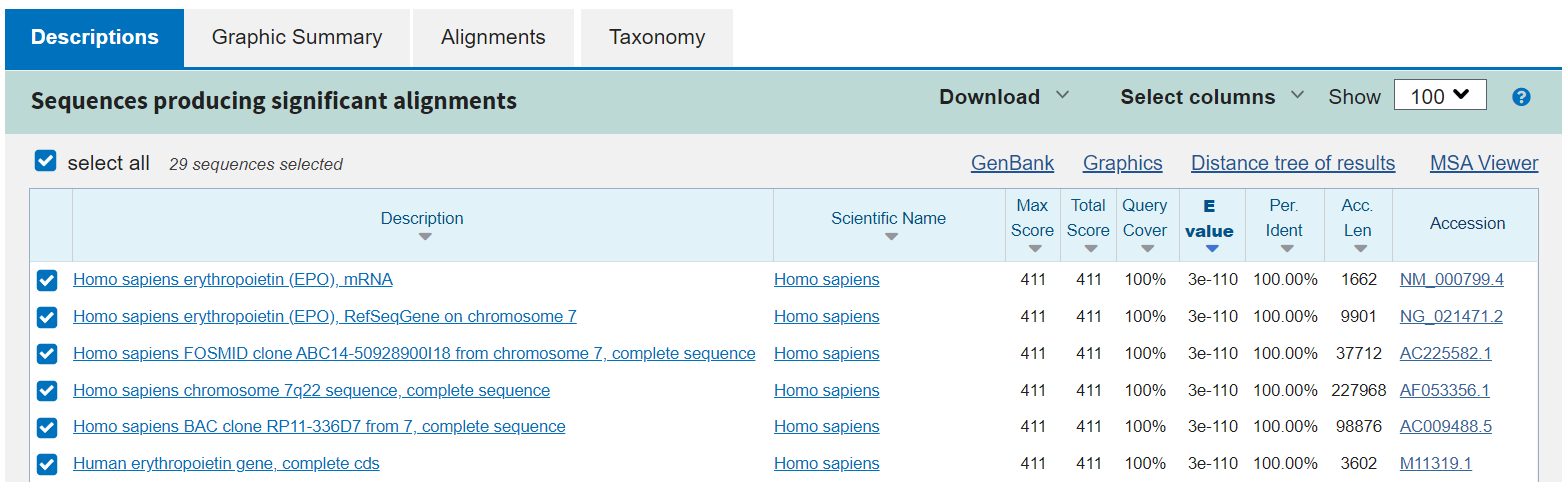

And a Vector Virus:

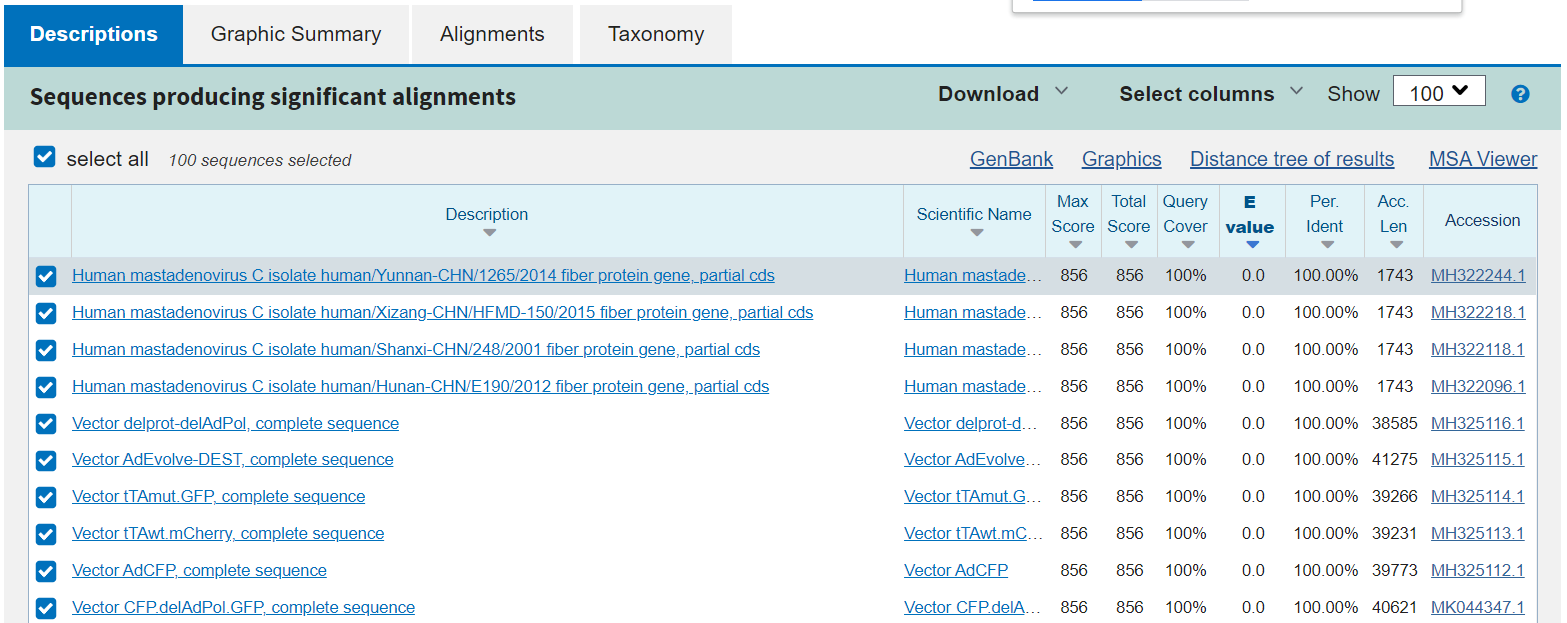

[200, 197, 172, 169, 239]


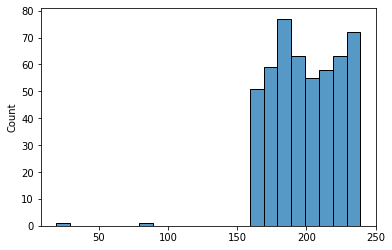

In [ ]:
import seaborn as sns

# Reading the data
fastaq_records = SeqIO.parse("sequencing_results.FASTQ", "fastq")
lengths = []

# Storing all the length values in a list
for record in fastaq_records:
  lengths.append(len(record.seq))

print(lengths[0:5])

sns.histplot(lengths)


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


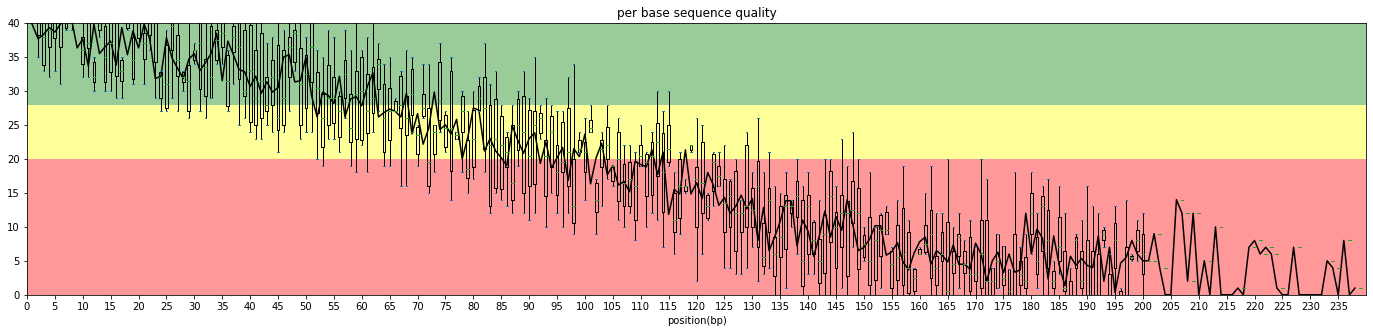

In [ ]:
# Code taken from
# https://dmnfarrell.github.io/python/fastq-quality-python

import os
import math
import pylab as plt
import numpy as np
import pandas as pd
import matplotlib.patches as patches

def plot_fastq_qualities(fataq_records, ax=None, limit=10000):

    res=[]
    c=0
    for record in fataq_records:
        score=record.letter_annotations["phred_quality"]
        res.append(score)
        c+=1
        if c>limit:
            break
    df = pd.DataFrame(res)
    l = len(df.T)+1

    if ax==None:
        f,ax=plt.subplots(figsize=(24,5))
    rect = patches.Rectangle((0,0),l,20,linewidth=0,facecolor='r',alpha=.4)
    ax.add_patch(rect)
    rect = patches.Rectangle((0,20),l,8,linewidth=0,facecolor='yellow',alpha=.4)
    ax.add_patch(rect)
    rect = patches.Rectangle((0,28),l,12,linewidth=0,facecolor='g',alpha=.4)
    ax.add_patch(rect)
    df.mean().plot(ax=ax,c='black')
    boxprops = dict(linestyle='-', linewidth=1, color='black')
    df.plot(kind='box', ax=ax, grid=False, showfliers=False,
            color=dict(boxes='black',whiskers='black')  )
    ax.set_xticks(np.arange(0, l, 5))
    ax.set_xticklabels(np.arange(0, l, 5))
    ax.set_xlabel('position(bp)')
    ax.set_xlim((0,l))
    ax.set_ylim((0,40))
    ax.set_title('per base sequence quality')    
    return

fastaq_records = SeqIO.parse("sequencing_results.FASTQ", "fastq")
plot_fastq_qualities(fastaq_records, limit=5) 

# Addemble the sequence
https://doua.prabi.fr/software/cap3


In [ ]:
# Lookup the Contigs in the Gene Database to find
# it is epo and an adeno virus


## 7.2 - Gene Expression Analysis

The following [study](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE186294) treated different subjects with EPO and compared their gene expression to an untreated control group. 
Does the treatment have any effects on the gene expression of the subjects.

Minimal Requiements for Submission:
- Table that describes what of the 50 samples belong to which subject and which point in time
- Table with fold-change and p-values for the 25 most relevant genes (highest absolute fold change and significant p-value)
- Heamap for the 25 most relevant genes
- Two-dimensional plot, that indicates whether the two treatment groups show any similarity/clusters
- A plot that indicated how the expression of one of these genes developes over the course of the experiments

In [ ]:
import pandas as pd

df = pd.read_csv("GSE186294_Illumina_RNAseq_raw_counts_EnsemblID.txt", sep =" ", on_bad_lines='skip')
df

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
ENSG00000000003,13,25,34,22,19,22,15,33,14,30,...,22,29,25,12,32,35,19,29,10,37
ENSG00000000419,1201,1540,1579,907,1450,1174,1129,1267,1081,1457,...,991,1192,1199,704,1155,1470,1320,1319,627,1221
ENSG00000000457,938,1128,1137,742,1095,1196,990,1300,1073,1326,...,899,1025,913,616,924,1121,962,974,538,859
ENSG00000000460,237,294,242,230,368,242,245,309,229,288,...,179,227,159,170,193,299,276,197,198,235
ENSG00000000938,21790,37053,23872,20536,29910,15952,19302,21463,20434,24090,...,28607,22767,24028,23193,30322,29583,29985,35049,23418,41337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000285897,21,27,28,17,39,19,18,9,16,29,...,19,14,32,13,29,17,15,27,15,24
ENSG00000285942,87,62,90,55,31,66,56,64,91,49,...,83,78,108,75,80,95,91,96,39,69
ENSG00000285943,170,165,153,94,115,283,217,215,220,262,...,131,122,129,99,135,139,139,124,98,48
ENSG00000285953,0,23,0,0,0,0,0,0,0,53,...,23,0,0,0,8,8,7,0,0,0


In [ ]:
df["2"].to_csv("subject_to_test.txt")

In [ ]:
# The Samples are numbered by subjects 1-10
# for each Subject we have 5 points of measurement
## NAME (DAY)
## Base1 (-20)
## Base2 (-4)
## EPO3 (2)
## EPO4 (16)
## Post7 (42)

In [ ]:
description = pd.read_csv("IllumiaSampleDescription.txt", sep ="\t", on_bad_lines='skip')
description = description.set_index("Sample_title")
description

,Sample 01 Illumina,Sample 02 Illumina,Sample 03 Illumina,Sample 04 Illumina,Sample 05 Illumina,Sample 06 Illumina,Sample 07 Illumina,Sample 08 Illumina,Sample 09 Illumina,Sample 10 Illumina,...,Sample 41 Illumina,Sample 42 Illumina,Sample 43 Illumina,Sample 44 Illumina,Sample 45 Illumina,Sample 46 Illumina,Sample 47 Illumina,Sample 48 Illumina,Sample 49 Illumina,Sample 50 Illumina
Sample_title,,,,,,,,,,,,,,,,,,,,,
Sample_geo_accession,GSM5643250,GSM5643251,GSM5643252,GSM5643253,GSM5643254,GSM5643255,GSM5643256,GSM5643257,GSM5643258,GSM5643259,...,GSM5643288,GSM5643289,GSM5643290,GSM5643291,GSM5643292,GSM5643293,GSM5643294,GSM5643295,GSM5643296,GSM5643297
subject,1,1,1,1,1,2,2,2,2,2,...,9,9,9,9,9,10,10,10,10,10
age,26,26,26,26,26,31,31,31,31,31,...,20,20,20,20,20,18,18,18,18,18
Sample_characteristics_ch1,time (day): Base1 (-20),time (day): Base2 (-4),time (day): EPO3 (2),time (day): EPO4 (16),time (day): Post7 (42),time (day): Base1 (-14),time (day): Base2 (-1),time (day): EPO3 (2),time (day): EPO4 (14),time (day): Post7 (43),...,time (day): Base1 (-13),time (day): Base2 (0),time (day): EPO3 (2),time (day): EPO4 (14),time (day): Post7 (43),time (day): Base1 (-20),time (day): Base2 (-5),time (day): EPO3 (2),time (day): EPO4 (16),time (day): Post7 (42)


In [ ]:
new_data = []

for (columnName, columnData) in description.iteritems():
    #print('Column Name : ', columnName)
    sample = columnName.split(" ")[1]
    subject = columnData["subject"]
    age = columnData["age"]
    time = columnData["Sample_characteristics_ch1"].split(" ")[2]
    day = columnData["Sample_characteristics_ch1"].split(" ")[3].replace("(","").replace(")","")

    new_data.append([sample,subject, age, time, day])

new_data

[['01', '1', '26', 'Base1', '-20'],
 ['02', '1', '26', 'Base2', '-4'],
 ['03', '1', '26', 'EPO3', '2'],
 ['04', '1', '26', 'EPO4', '16'],
 ['05', '1', '26', 'Post7', '42'],
 ['06', '2', '31', 'Base1', '-14'],
 ['07', '2', '31', 'Base2', '-1'],
 ['08', '2', '31', 'EPO3', '2'],
 ['09', '2', '31', 'EPO4', '14'],
 ['10', '2', '31', 'Post7', '43'],
 ['11', '3', '25', 'Base1', '-14'],
 ['12', '3', '25', 'Base2', '0'],
 ['13', '3', '25', 'EPO3', '2'],
 ['14', '3', '25', 'EPO4', '14'],
 ['15', '3', '25', 'Post7', '43'],
 ['16', '4', '33', 'Base1', '-8'],
 ['17', '4', '33', 'Base2', '-1'],
 ['18', '4', '33', 'EPO3', '2'],
 ['19', '4', '33', 'EPO4', '14'],
 ['20', '4', '33', 'Post7', '44'],
 ['21', '5', '34', 'Base1', '-14'],
 ['22', '5', '34', 'Base2', '-7'],
 ['23', '5', '34', 'EPO3', '2'],
 ['24', '5', '34', 'EPO4', '14'],
 ['25', '5', '34', 'Post7', '43'],
 ['26', '6', '23', 'Base1', '-7'],
 ['27', '6', '23', 'Base2', '0'],
 ['28', '6', '23', 'EPO3', '2'],
 ['29', '6', '23', 'EPO4', '14'],
 

In [ ]:
df1 = pd.DataFrame.from_records(new_data, columns=['sample', 'subject_id', 'age', 'time', 'day'])
df1

,sample,subject_id,age,time,day
0,01,1,26,Base1,-20
1,02,1,26,Base2,-4
2,03,1,26,EPO3,2
3,04,1,26,EPO4,16
4,05,1,26,Post7,42
5,06,2,31,Base1,-14
6,07,2,31,Base2,-1
7,08,2,31,EPO3,2
8,09,2,31,EPO4,14
9,10,2,31,Post7,43


In [ ]:
df1.to_csv("Illumia_clean_sample_data.csv")

df1 = pd.read_csv("Illumia_clean_sample_data.csv")

In [ ]:
base1_columns = df1[df1["time"]=="Base1"]["sample"].values
base1_columns

array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46])

In [ ]:
epo4_columns = df1[df1["time"]=="EPO4"]["sample"].values
epo4_columns

array([ 4,  9, 14, 19, 24, 29, 34, 39, 44, 49])

## log2FC


In [ ]:
df.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '34', '35', '36', '37', '38',
       '39', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50'],
      dtype='object')

In [ ]:
control = [ "1",  "6", "11", "16", "21", "26", "31", "36", "41", "46"]
treatment = [ "4",  "9", "14", "19", "24", "29", "34", "39", "44", "49"]

from scipy.stats import ttest_ind
import numpy as np

df["Mean_Control"] = df[control].mean(axis=1)
df["Mean_Treatment"] = df[treatment].mean(axis=1)
df["log2FC"] = np.log2(df["Mean_Treatment"]/df["Mean_Control"])
df

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,Mean_Control,Mean_Treatment,log2FC
ENSG00000000003,13,25,34,22,19,22,15,33,14,30,...,12,32,35,19,29,10,37,30.6,18.6,-0.718229
ENSG00000000419,1201,1540,1579,907,1450,1174,1129,1267,1081,1457,...,704,1155,1470,1320,1319,627,1221,1217.1,836.8,-0.540493
ENSG00000000457,938,1128,1137,742,1095,1196,990,1300,1073,1326,...,616,924,1121,962,974,538,859,1068.2,754.6,-0.501398
ENSG00000000460,237,294,242,230,368,242,245,309,229,288,...,170,193,299,276,197,198,235,253.4,212.5,-0.253954
ENSG00000000938,21790,37053,23872,20536,29910,15952,19302,21463,20434,24090,...,23193,30322,29583,29985,35049,23418,41337,24332.5,20473.1,-0.249155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000285897,21,27,28,17,39,19,18,9,16,29,...,13,29,17,15,27,15,24,18.4,15.2,-0.275634
ENSG00000285942,87,62,90,55,31,66,56,64,91,49,...,75,80,95,91,96,39,69,78.6,74.6,-0.075354
ENSG00000285943,170,165,153,94,115,283,217,215,220,262,...,99,135,139,139,124,98,48,176.0,132.2,-0.412853
ENSG00000285953,0,23,0,0,0,0,0,0,0,53,...,0,8,8,7,0,0,0,19.0,15.3,-0.312468


In [ ]:
df

,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,Mean_Control,Mean_Treatment,log2FC
ENSG00000000003,13,25,34,22,19,22,15,33,14,30,...,12,32,35,19,29,10,37,30.6,18.6,-0.718229
ENSG00000000419,1201,1540,1579,907,1450,1174,1129,1267,1081,1457,...,704,1155,1470,1320,1319,627,1221,1217.1,836.8,-0.540493
ENSG00000000457,938,1128,1137,742,1095,1196,990,1300,1073,1326,...,616,924,1121,962,974,538,859,1068.2,754.6,-0.501398
ENSG00000000460,237,294,242,230,368,242,245,309,229,288,...,170,193,299,276,197,198,235,253.4,212.5,-0.253954
ENSG00000000938,21790,37053,23872,20536,29910,15952,19302,21463,20434,24090,...,23193,30322,29583,29985,35049,23418,41337,24332.5,20473.1,-0.249155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000285897,21,27,28,17,39,19,18,9,16,29,...,13,29,17,15,27,15,24,18.4,15.2,-0.275634
ENSG00000285942,87,62,90,55,31,66,56,64,91,49,...,75,80,95,91,96,39,69,78.6,74.6,-0.075354
ENSG00000285943,170,165,153,94,115,283,217,215,220,262,...,99,135,139,139,124,98,48,176.0,132.2,-0.412853
ENSG00000285953,0,23,0,0,0,0,0,0,0,53,...,0,8,8,7,0,0,0,19.0,15.3,-0.312468


T-Test should not be independent

In [ ]:
from scipy.stats import ttest_ind

row = 0 

def t_test(row, treatment, control):
  statistic, p = ttest_ind(df.iloc[row][control], df.iloc[row][treatment])
  return p


p_values =[]
for row in range(len(df)):
  p_value = t_test(row, treatment, control)
  p_values.append(p_value)
  
df["p-value"] = p_values


In [ ]:
df

,1,2,3,4,5,6,7,8,9,10,...,45,46,47,48,49,50,Mean_Control,Mean_Treatment,log2FC,p-value
ENSG00000000003,13,25,34,22,19,22,15,33,14,30,...,32,35,19,29,10,37,30.6,18.6,-0.718229,0.104181
ENSG00000000419,1201,1540,1579,907,1450,1174,1129,1267,1081,1457,...,1155,1470,1320,1319,627,1221,1217.1,836.8,-0.540493,0.004108
ENSG00000000457,938,1128,1137,742,1095,1196,990,1300,1073,1326,...,924,1121,962,974,538,859,1068.2,754.6,-0.501398,0.013612
ENSG00000000460,237,294,242,230,368,242,245,309,229,288,...,193,299,276,197,198,235,253.4,212.5,-0.253954,0.178997
ENSG00000000938,21790,37053,23872,20536,29910,15952,19302,21463,20434,24090,...,30322,29583,29985,35049,23418,41337,24332.5,20473.1,-0.249155,0.193211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000285897,21,27,28,17,39,19,18,9,16,29,...,29,17,15,27,15,24,18.4,15.2,-0.275634,0.148307
ENSG00000285942,87,62,90,55,31,66,56,64,91,49,...,80,95,91,96,39,69,78.6,74.6,-0.075354,0.691371
ENSG00000285943,170,165,153,94,115,283,217,215,220,262,...,135,139,139,124,98,48,176.0,132.2,-0.412853,0.106393
ENSG00000285953,0,23,0,0,0,0,0,0,0,53,...,8,8,7,0,0,0,19.0,15.3,-0.312468,0.771823


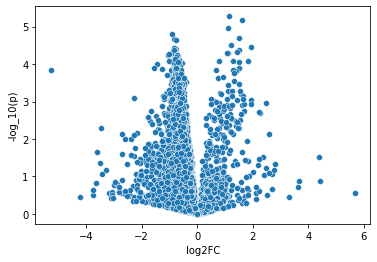

In [ ]:
df["-log_10(p)"] = -np.log10(df["p-value"])
import seaborn as sns

sns.scatterplot(data=df, x="log2FC", y="-log_10(p)")

## Filter the data

In [ ]:
# make a copy of the original dataframe
df_subsample = df.copy()


# Define the numbers of genes we want to analyze
no_of_relevant_genes = 50



# remove the non-numeric values
# however, these values indicate large changes, so we could also replace the infinity with a lage number
df_subsample = df_subsample[df_subsample["log2FC"]!=float("-inf")]
df_subsample = df_subsample[df_subsample["log2FC"]!=float("inf")]

# remove everything with a p-value smaller 5%
df_subsample = df_subsample[df_subsample["p-value"]<0.05]

# create a variable that allows the sort positive and negative changes at once
df_subsample["log2FC2"] = df_subsample["log2FC"]**2

# sort and select the top 50 values
df_subsample = df_subsample.sort_values(by = "log2FC2").tail(no_of_relevant_genes)

# Reset the index, so it is the gene name
#df_subsample = df_subsample.set_index("NAME")

df_subsample


,1,2,3,4,5,6,7,8,9,10,...,47,48,49,50,Mean_Control,Mean_Treatment,log2FC,p-value,-log_10(p),log2FC2
ENSG00000243064,77,48,90,307,12,42,100,78,97,2,...,61,66,390,13,74.6,236.3,1.663372,0.000848,3.071735,2.766807
ENSG00000115461,5,3,1,4,4,2,3,10,1,5,...,1,3,0,1,3.2,1.0,-1.678072,0.020590,1.686339,2.815925
ENSG00000167768,66,40,107,346,8,157,341,227,408,96,...,301,376,1799,94,292.2,940.0,1.685705,0.001195,2.922755,2.841600
ENSG00000158578,1299,1314,2079,6423,241,1279,2730,2214,2941,50,...,2175,2289,14836,589,2669.8,8663.8,1.698268,0.001774,2.750927,2.884115
ENSG00000166211,1,7,1,0,13,4,1,0,0,3,...,1,1,0,1,2.6,0.8,-1.700440,0.034880,1.457424,2.891495
ENSG00000185640,1,0,5,5,0,1,5,2,4,0,...,4,4,18,0,2.3,7.5,1.705257,0.036478,1.437967,2.907901
ENSG00000169248,14,91,6,3,131,5,5,19,6,22,...,14,6,1,42,8.5,2.6,-1.708951,0.003276,2.484675,2.920514
ENSG00000168032,1,3,0,0,0,3,6,3,3,3,...,8,0,2,7,3.0,0.9,-1.736966,0.013481,1.870270,3.017049
ENSG00000197889,1,2,4,0,3,5,5,4,4,0,...,4,4,3,4,4.4,1.3,-1.758992,0.002542,2.594806,3.094053
ENSG00000172365,5,5,0,1,4,4,2,2,1,1,...,3,4,0,2,2.4,0.7,-1.777608,0.015632,1.805989,3.159889


In [ ]:
# Drop all Columns not necessary for plotting
df_subsample_to_plot = df_subsample.drop(columns = ["Mean_Control",	"Mean_Treatment",	"log2FC",	"p-value",	"-log_10(p)",	"log2FC2"])

# Only take the 2 relevant sampes

df_subsample_to_plot = df_subsample_to_plot[["1",  "6", "11", "16", "21", "26", "31", "36", "41", "46", "4",  "9", "14", "19", "24", "29", "34", "39", "44", "49"]]
df_subsample_to_plot.head()

,1,6,11,16,21,26,31,36,41,46,4,9,14,19,24,29,34,39,44,49
ENSG00000243064,77,42,247,25,35,81,70,66,66,37,307,97,279,72,104,201,326,274,313,390
ENSG00000115461,5,2,5,4,8,3,1,1,3,0,4,1,0,0,0,2,2,1,0,0
ENSG00000167768,66,157,1087,202,290,406,257,151,158,148,346,408,1452,936,686,728,1106,938,1001,1799
ENSG00000158578,1299,1279,11173,843,3267,3182,1402,2072,1008,1173,6423,2941,14053,5628,7757,6554,9786,13345,5315,14836
ENSG00000166211,1,4,0,2,4,6,6,2,0,1,0,0,0,3,1,1,0,1,2,0


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (20). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


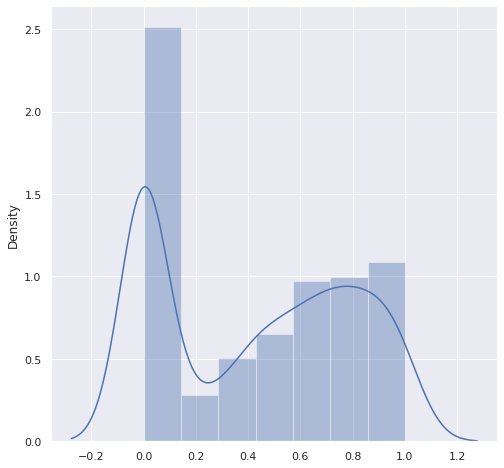

In [ ]:
# Loads the quantile scaler
from sklearn.preprocessing import QuantileTransformer

# Defines the quantile scaler
scaler = QuantileTransformer()

# Scales the data
# We transpose the data frame and retranspose it, as the scaler usally works by columns and not by row
X_scaled=pd.DataFrame(scaler.fit_transform(df_subsample_to_plot.T).T,columns=df_subsample_to_plot.columns)

# Resetting the index, that was lost during scaling
X_scaled = X_scaled.set_index(df_subsample_to_plot.index)

# Plotting the new distribution
sns.set(rc={'figure.figsize':(8,8)})
sns.distplot(X_scaled)

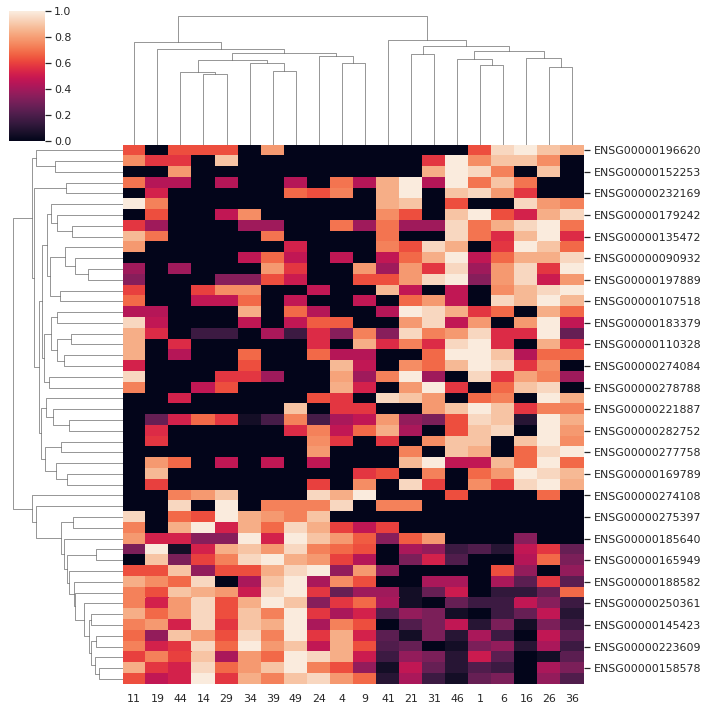

In [ ]:
# Loading seaborn
import seaborn as sns; sns.set_theme(color_codes=True)

# Plotting the map
g = sns.clustermap(X_scaled)

# the dentrogram clusters the groups correctly

In [ ]:
# Umap

# Scale the training data
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

scaled_X_train = std_scaler.fit_transform(df_subsample_to_plot)

scaled_X_train.shape

(50, 20)

In [ ]:
group = []
for i in df_subsample_to_plot.columns:
  if i in control:
    group.append(0)
  else:
    group.append(1)

group

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
control = [ "1",  "6", "11", "16", "21", "26", "31", "36", "41", "46"]
treatment = [ "4",  "9", "14", "19", "24", "29", "34", "39", "44", "49"]



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


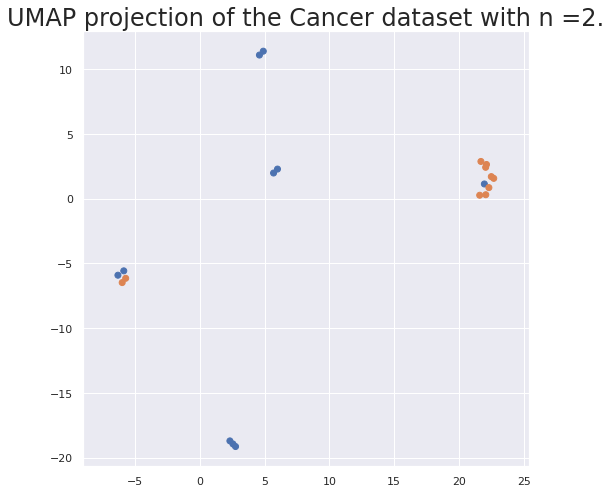

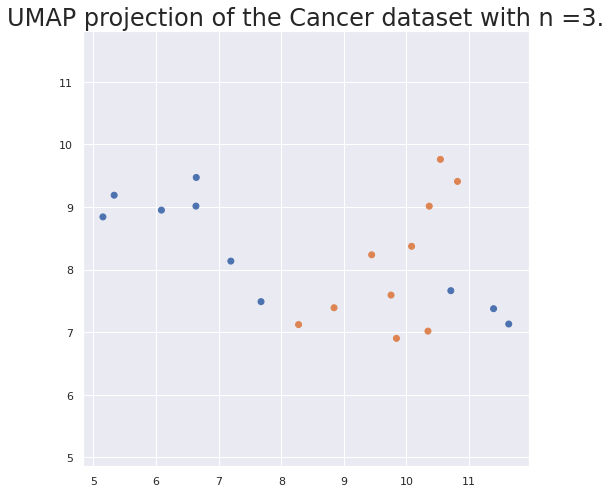

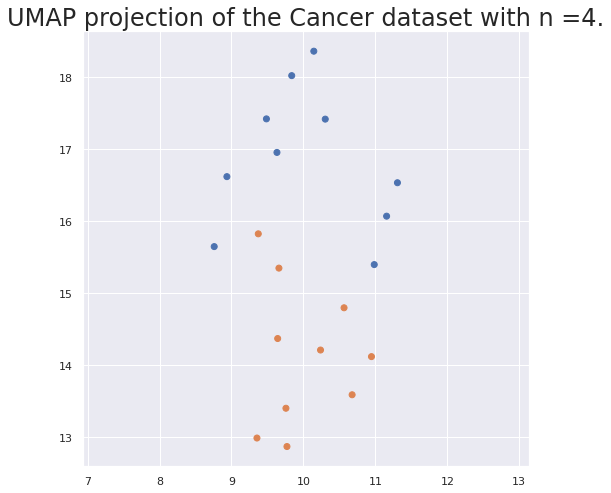

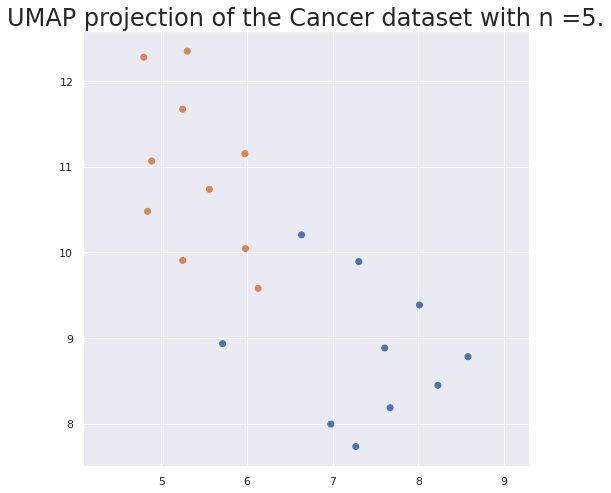

In [ ]:
!pip install umap-learn

import umap.umap_ as umap
np.random.seed(42)

for n in range(2,6):
# Perform UMAP
  reducer = umap.UMAP(n_neighbors = n, min_dist = 0.2)
  embedding = reducer.fit_transform(scaled_X_train.T)
  embedding.shape

  # Plot the UMAP
  plt.figure()
  plt.scatter(
      embedding[:, 0],
      embedding[:, 1],
      c=[sns.color_palette()[x] for x in group]
  )
  plt.gca().set_aspect('equal', 'datalim')
  plt.title('UMAP projection of the Cancer dataset with n ={}.'.format(n), fontsize=24)
  plt.show()

## 7.3 - Classificator



In [ ]:
https://pubmed.ncbi.nlm.nih.gov/34440425/
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4203840/


# RNA-seq
https://www.ncbi.nlm.nih.gov/nuccore/NM_000799

# Adeno Virus
https://www.ncbi.nlm.nih.gov/data-hub/taxonomy/28285/


SyntaxError: ignored